hey the product looks great! this was exaclty what I imagined. One question though. How did you do the headings? For example the "Reading Data" heading? In my notebook it tells me jupyter notebook no longer does heading cells. This may be a question that comes up in class and also could you add some explanation for the the Regression to Predict Ratings, Label encoding on catergorical data, and the three regression models at the end, but outside those small tweaks it looks great!

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

plt.rcParams["figure.figsize"] = (4,3)

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df_red = pd.read_csv('Red.csv')
df_rose = pd.read_csv('Rose.csv')
df_spark = pd.read_csv('Sparkling.csv')
df_white = pd.read_csv('White.csv')

### Shape of Data

In [55]:
print(df_red.shape)
print(df_rose.shape)
print(df_spark.shape)
print(df_white.shape)

(8666, 9)
(397, 9)
(1007, 9)
(3764, 9)


In [5]:
df_red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [6]:
df_rose.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018


In [7]:
df_white.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [8]:
df_spark.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.


Let's first add new column for each dataframe that will show the category name.\
and then we will join the dataframe as one and will work on that.

In [9]:
df_red['Wine_Category'] = 'red'
df_rose['Wine_Category'] = 'rose'
df_white['Wine_Category'] = 'white'
df_spark['Wine_Category'] = 'sparkling'


### Concatenating Data into 1 Dataframe

In [10]:
df_wines = pd.concat([df_red, df_rose, df_white, df_spark])

In [11]:
df_wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Wine_Category
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red


In [12]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13834 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   Wine_Category    13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.1+ MB


There are some wines which are Non.Vintage, which are the blends from any 2 years so let's give them any number like 2050.

In [13]:
df_wines['Year'] = df_wines['Year'].replace('N.V.', 2050) 
df_wines['Year'] = pd.to_numeric(df_wines['Year'])


In [14]:
df_wines.describe()

,Rating,NumberOfRatings,Price,Year
count,13834.000000,13834.000000,13834.000000,13834.000000
mean,3.865664,428.322466,33.024850,2017.385499
std,0.296427,1838.413812,70.899893,8.403591
min,2.200000,25.000000,3.150000,1961.000000
25%,3.700000,56.000000,9.902500,2015.000000
50%,3.900000,129.000000,15.950000,2016.000000
75%,4.100000,336.000000,32.500000,2018.000000
max,4.900000,94287.000000,3410.790000,2050.000000


## Exploratory Data Analysis

In [15]:
df_wines.head(3)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Wine_Category
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red


In [16]:
top_countries = df_wines['Country'].value_counts()[:10]

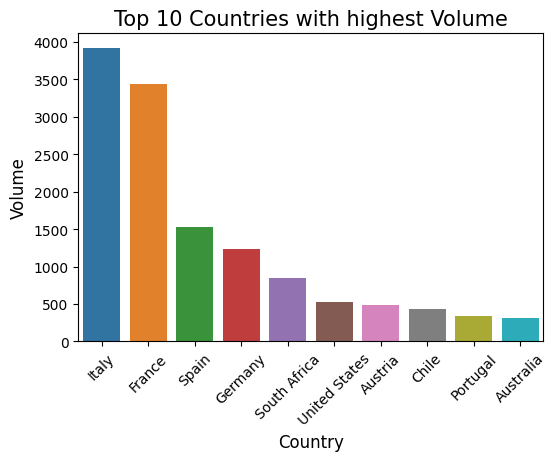

In [17]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Country', data=df_wines[df_wines['Country'].isin(top_countries.index.values)], order=top_countries.index)
ax.set_title("Top 10 Countries with highest Volume", fontsize=15)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Volume", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [18]:
top_regions = df_wines['Region'].value_counts()[:10]

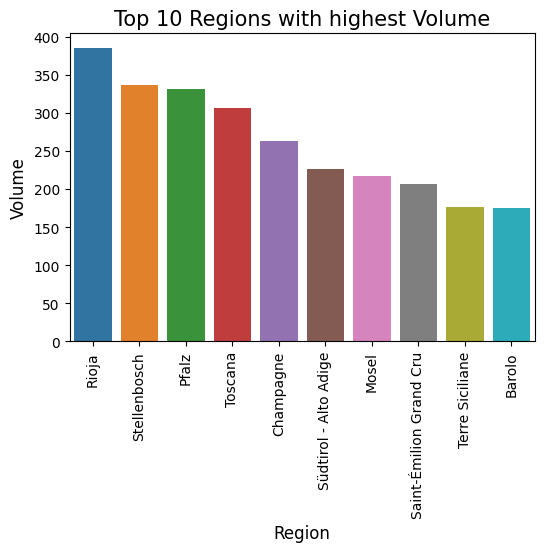

In [19]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Region', data=df_wines[df_wines['Region'].isin(top_regions.index.values)], order=top_regions.index)
ax.set_title("Top 10 Regions with highest Volume", fontsize=15)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Volume", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [20]:
top_years = df_wines['Year'].value_counts()[:10]

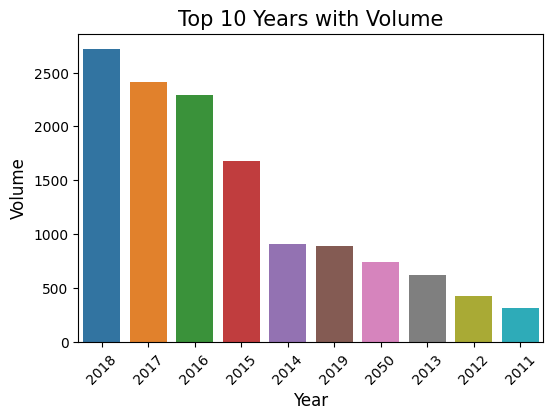

In [21]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Year', data=df_wines[df_wines['Year'].isin(top_years.index.values)], order=top_years.index)
ax.set_title("Top 10 Years with Volume", fontsize=15)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Volume", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

This shows that with each increasing year the volume also increases.

In [22]:
top_categories = df_wines['Wine_Category'].value_counts()

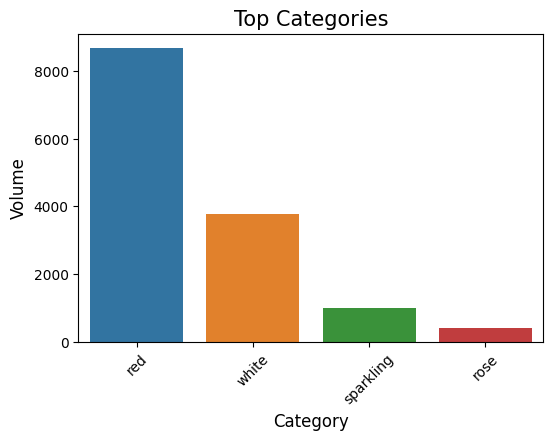

In [23]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Wine_Category', data=df_wines[df_wines['Wine_Category'].isin(top_categories.index.values)], order=top_categories.index)
ax.set_title("Top Categories", fontsize=15)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Volume", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

The mostly used Wine is Red.

In [24]:
df_wines.head(2)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Wine_Category
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.0,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.5,2017,red


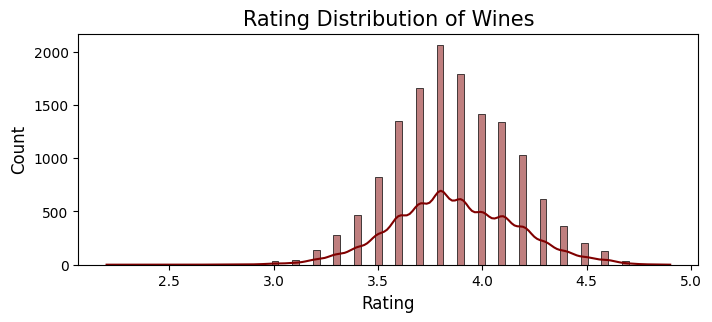

In [25]:
plt.figure(figsize=(8,3))
ax = sns.histplot(x='Rating', data=df_wines, color='maroon', kde=True)
ax.set_title("Rating Distribution of Wines", fontsize=15)
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

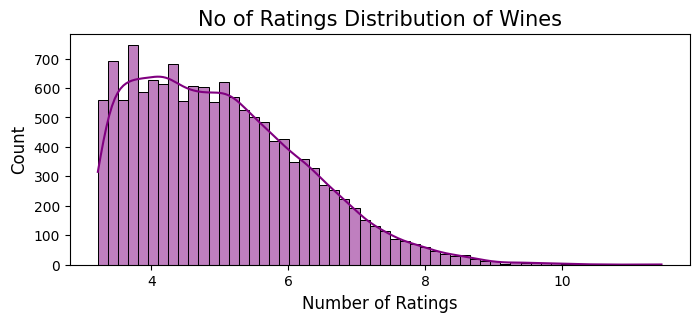

In [26]:
plt.figure(figsize=(8,3))
ax = sns.histplot(np.log(df_wines['NumberOfRatings']), color='purple', kde=True)
ax.set_title("No of Ratings Distribution of Wines", fontsize=15)
ax.set_xlabel("Number of Ratings", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

## Which country, region and winery has the highest rating and price?

### Highest Ratings

#### Top 5 Countries with Highest Mean Rating

In [27]:
df_wines.groupby(['Country'])['Rating'].mean().sort_values(ascending=False)[:5].reset_index()

,Country,Rating
0,Moldova,4.175000
1,Lebanon,4.137500
2,Croatia,4.083333
3,Czech Republic,4.050000
4,United Kingdom,4.033333


#### Top 5 Regions with Highest Mean Rating

In [28]:
df_wines.groupby(['Region'])['Rating'].mean().sort_values(ascending=False)[:5].reset_index()

,Region,Rating
0,Montrachet Grand Cru,4.900
1,Bolgheri Sassicaia,4.625
2,Bâtard-Montrachet Grand Cru,4.600
3,Stags Leap District,4.550
4,San Carlos,4.500


#### Top 5 Wineries with Highest Mean Rating

In [29]:
df_wines.groupby(['Winery'])['Rating'].mean().sort_values(ascending=False)[:5].reset_index()

,Winery,Rating
0,Masseto,4.733333
1,Dal Forno Romano,4.700000
2,Pétrus,4.700000
3,Promontory,4.700000
4,Giacomo Conterno,4.700000


### Highest Prices

#### Top 5 Countries with Highest Mean Price

In [30]:
df_wines.groupby(['Country'])['Price'].mean().sort_values(ascending=False)[:5].reset_index()

,Country,Price
0,United Kingdom,57.770000
1,France,55.539331
2,United States,43.719170
3,Lebanon,36.887500
4,Australia,36.781132


#### Top 5 Regions with Highest Mean Price

In [31]:
df_wines.groupby(['Region'])['Price'].mean().sort_values(ascending=False)[:5].reset_index()

,Region,Price
0,Musigny Grand Cru,995.0000
1,Montrachet Grand Cru,681.3700
2,Bâtard-Montrachet Grand Cru,520.0000
3,Bolgheri Sassicaia,400.0725
4,Bonnes-Mares Grand Cru,291.4600


#### Top 5 Wineries with Highest Mean Price

In [32]:
df_wines.groupby(['Winery'])['Price'].mean().sort_values(ascending=False)[:5].reset_index()

,Winery,Price
0,Pétrus,3410.790
1,Château Ausone,1087.540
2,Domaine Comte Georges de Vogüé,995.000
3,Masseto,963.490
4,Château Lafite Rothschild,849.175


## Which country, region and winery has the lowest rating and price?

### Lowest Rating

#### Top 5 Countries with Lowest Ratings

In [33]:
df_wines.groupby(['Country'])['Rating'].mean().sort_values(ascending=True)[:5].reset_index()

,Country,Rating
0,China,3.200000
1,Mexico,3.400000
2,Canada,3.433333
3,Brazil,3.510000
4,Turkey,3.660000


#### Top 5 Regions with Lowest Ratings

In [34]:
df_wines.groupby(['Region'])['Rating'].mean().sort_values(ascending=True)[:5].reset_index()

,Region,Rating
0,Peloponnesos,2.20
1,Mâcon,3.10
2,Dolcetto d'Acqui,3.10
3,Ningxia,3.20
4,San Rafael,3.25


#### Top 5 Wineries with Lowest Ratings

In [35]:
df_wines.groupby(['Winery'])['Rating'].mean().sort_values(ascending=True)[:5].reset_index()

,Winery,Rating
0,Cantina di Soave,2.700000
1,Piazzo,2.700000
2,Château Amandiers,2.800000
3,Cape Town Wine Co,2.866667
4,Crin Roja,2.900000


### Lowest Prices

#### Top 5 Countries with Lowest Price

In [36]:
df_wines.groupby(['Country'])['Price'].mean().sort_values(ascending=True)[:5].reset_index()

,Country,Price
0,Mexico,8.650000
1,Bulgaria,10.150000
2,Romania,12.816216
3,Slovenia,13.050000
4,Hungary,13.366842


#### Top 5 Regions with Lowest Price

In [37]:
df_wines.groupby(['Region'])['Price'].mean().sort_values(ascending=True)[:5].reset_index()

,Region,Price
0,Daunia,4.28
1,Peloponnesos,5.35
2,Manchuela,5.50
3,McGregor,5.55
4,Aude,5.68


#### Top 5 Wineries with Lowest Price

In [38]:
df_wines.groupby(['Winery'])['Price'].mean().sort_values(ascending=True)[:5].reset_index()

,Winery,Price
0,Gualtieri,3.15
1,Isidro Milagro,3.70
2,Mas Janeil,3.70
3,Monte Pietroso,3.79
4,Bodegas Victorianas,3.99


## Which years had the least and most total amount of ratings?

In [39]:
df_wines.groupby(['Year'])['NumberOfRatings'].mean().sort_values(ascending=False)[:5].reset_index()

,Year,NumberOfRatings
0,2050,2125.002688
1,1989,1075.000000
2,1993,886.500000
3,2002,834.000000
4,2008,629.386139


So we can see that Year 2050 have highest amount of ratings but as we know that we put 2050 to that value when the 2 years combined for that wine.\
so we can say that 1989 have the Highest Amount of Ratings 

In [40]:
df_wines.groupby(['Year'])['NumberOfRatings'].mean().sort_values(ascending=True)[:5].reset_index()

,Year,NumberOfRatings
0,2020,61.500000
1,1996,104.000000
2,1995,156.000000
3,2019,189.458007
4,1988,203.000000


Year 2020 have the Lowest amount of Ratings

## Any one winery that disproportionately total high average ratings and higher price? 

In [41]:
df_wines.groupby(['Winery'])[['Rating', 'Price']].mean().sort_values(by=['Price','Rating'], ascending=False)[:1]

,Rating,Price
Winery,,
Pétrus,4.7,3410.79


The Petrus Winery have the Highest Price and then the Highest Rating in that Price.

## Are there any trends between years, regions, and rating?

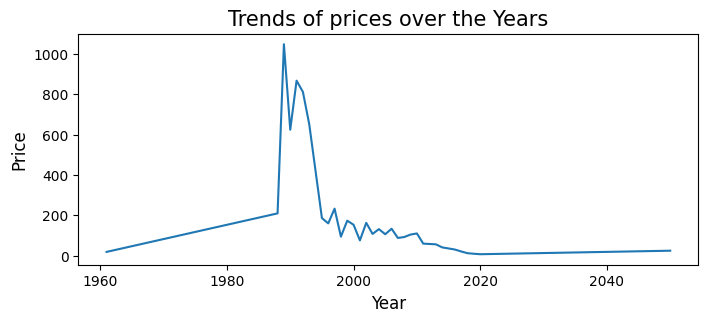

In [42]:
ax = df_wines.groupby(['Year'])['Price'].mean().plot(figsize=(8, 3))
ax.set_title('Trends of prices over the Years', fontsize=15)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.show()

From here we can see that The Prices are huge from around year 1985-1995.

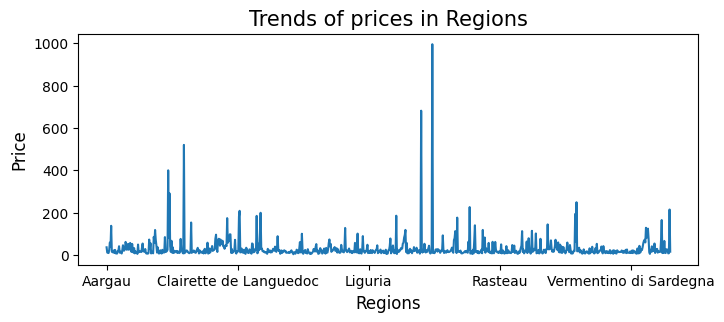

In [43]:
ax = df_wines.groupby(['Region'])['Price'].mean().plot(figsize=(8, 3))
ax.set_title('Trends of prices in Regions', fontsize=15)
ax.set_xlabel("Regions", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.show()

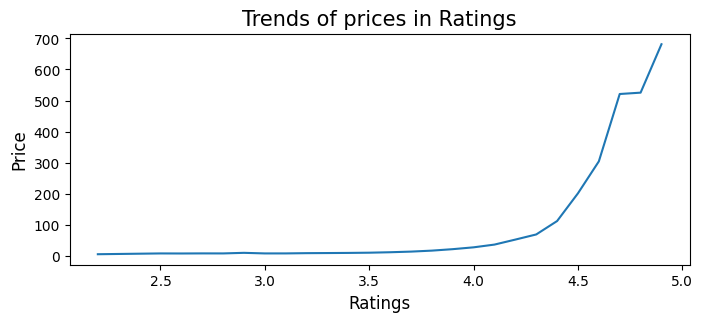

In [44]:
ax = df_wines.groupby(['Rating'])['Price'].mean().plot(figsize=(8, 3))
ax.set_title('Trends of prices in Ratings', fontsize=15)
ax.set_xlabel("Ratings", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.show()

This shows that when the Ratings of Wines increase by 4 the Price also increases.

## Correlation Graph

<AxesSubplot: >

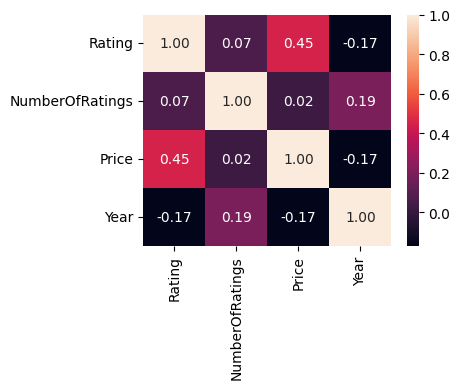

In [45]:
sns.heatmap(df_wines.corr(), annot=True, fmt=".2f")

## Regression to predict Ratings

In [46]:
# Here we are selecting the columns

df_wines1 = df_wines.drop(['Name'], axis=1)
cat_cols = [col for col in df_wines1.columns if df_wines1[col].dtype == "object"]

In [47]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13834 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  int64  
 8   Wine_Category    13834 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


### Label Encoding on Categorical Data

In [49]:
# converting the textual categorical columns to integers through label Encoding
label_encoder = LabelEncoder()
for col in cat_cols:
    df_wines1[col] = label_encoder.fit_transform(df_wines1[col])

### Applied Linear Regression, Lasso Regression and Ridge Regression

In [54]:

X = df_wines1.drop(['Rating'], axis=1) # This contains Feature Attribute
y = df_wines1['Rating'] # This contain Target Attribte.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# Evaluate the models
print("Linear Regression:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, lr_pred))
print("R2 score: %.2f" % r2_score(y_test, lr_pred))

print("Lasso Regression:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, lasso_pred))
print("R2 score: %.2f" % r2_score(y_test, lasso_pred))

print("Ridge Regression:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, ridge_pred))
print("R2 score: %.2f" % r2_score(y_test, ridge_pred))


Linear Regression:
Mean squared error: 0.08
R2 score: 0.06
Lasso Regression:
Mean squared error: 0.08
R2 score: 0.11
Ridge Regression:
Mean squared error: 0.08
R2 score: 0.06


so From above we can see that our model doesn't worked best on our data to predict the Rating.\
R-squared of 0.06 is not a good fit for the data and suggests that there is little to no relationship between the independent variable(s) and the dependent variable. It is important to note that a low R-squared value does not necessarily mean that the independent variable(s) are not significant or that the model is useless, but it does suggest that the model is not a strong predictor of the dependent variable.